# Twitter Insights

In [1]:
# !pip install -q textblob
# !pip install -q wordcloud
# !pip install -q pyLDAvis
# !pip install -q gensim
# !pip install -q UMAP
import gensim
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import seaborn as sns
from textblob import TextBlob
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import pyLDAvis
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# nltk.download('all')
# pd.set_option("display.max_colwidth", 200)

In [3]:
! ls /../home/explore/

anaconda3		   TrafficAndCongestion2(1).ipynb
Clustering Examples.ipynb  TrafficAndCongestion2.ipynb
Finding Routes.ipynb	   TrafficAndCongestion3.ipynb
nltk_data		   TrafficAndCongestion.ipynb
s3fs-fuse


In [4]:
! ls /../edsa-traffic

SANRAL	Twitter


In [5]:
! ls /../edsa-traffic/SANRAL

all_cars_agg.csv  all_vel_agg.csv  df_agg_counts.csv  gantry_locations.csv  raw


In [6]:
! ls /../edsa-traffic/Twitter

ewntraffic.csv


In [7]:
# #Importing SANRAL the data
# all_cars_agg = pd.read_csv('/../edsa-traffic/SANRAL/all_cars_agg.csv')
# all_cars_agg.head()

In [8]:
#Importing Twitter the data
df = pd.read_csv('/../edsa-traffic/Twitter/ewntraffic.csv')
df.head()

,favorite_count,source,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
0,1,Twitter Web Client,Reports of a shootout in Midrand on the N1 Nor...,NaN,False,Thu Oct 30 08:07:20 +0000 2014,6,527733476574134272
1,0,TweetDeck,#JHBtraffic - Lioghts OUT in City Deep at Heid...,NaN,False,Tue Oct 07 04:24:29 +0000 2014,2,519342475077763072
2,0,TweetDeck,#JHBtraffic Lights OUT in Booysens at Booysens...,NaN,False,Tue Oct 07 04:25:14 +0000 2014,1,519342664203132928
3,0,Twitter Web Client,#JHBTraffic remains very slow on the N1 North ...,NaN,False,Wed Oct 22 06:44:25 +0000 2014,1,524813509654478848
4,1,Twitter Web Client,#JHBTraffic RT @jhbnorthmedix: Cash in Transit...,NaN,False,Tue Oct 14 06:35:48 +0000 2014,2,521912238085767168


In [9]:
df.drop(['id_str','in_reply_to_screen_name'], axis=1, inplace=True)
df['tweet_len'] = df.text.apply(lambda x:len(x))
df['created_at'] = pd.to_datetime(df['created_at'])
# df['created_at'] = df['created_at'].dt.strftime('%Y/%m/%d:%H')
df.head()

,favorite_count,source,text,is_retweet,created_at,retweet_count,tweet_len
0,1,Twitter Web Client,Reports of a shootout in Midrand on the N1 Nor...,False,2014-10-30 08:07:20+00:00,6,132
1,0,TweetDeck,#JHBtraffic - Lioghts OUT in City Deep at Heid...,False,2014-10-07 04:24:29+00:00,2,102
2,0,TweetDeck,#JHBtraffic Lights OUT in Booysens at Booysens...,False,2014-10-07 04:25:14+00:00,1,130
3,0,Twitter Web Client,#JHBTraffic remains very slow on the N1 North ...,False,2014-10-22 06:44:25+00:00,1,110
4,1,Twitter Web Client,#JHBTraffic RT @jhbnorthmedix: Cash in Transit...,False,2014-10-14 06:35:48+00:00,2,83


In [10]:
# Get average length over all tweets:
print(np.floor(np.mean(df['tweet_len'])))

116.0


In [11]:
# Get the number of likes for the most liked tweet:
print(np.max(df['favorite_count']))

27


In [12]:
# Get the number of retweets for the most retweeted tweet:
print(np.max(df['retweet_count']))

264


# Time Series Patterns

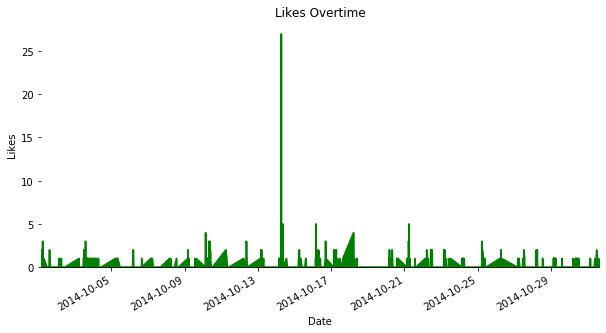

In [13]:
# Time Series plot

time_retweets = pd.Series(data=df['favorite_count'].values, index=df['created_at'])
ax = time_retweets.plot(kind='area', figsize=(10, 5), color='g', title="Likes Overtime")
ax.set_ylabel('Likes')
ax.set_xlabel('Date')
sns.despine(left=True)
plt.show()

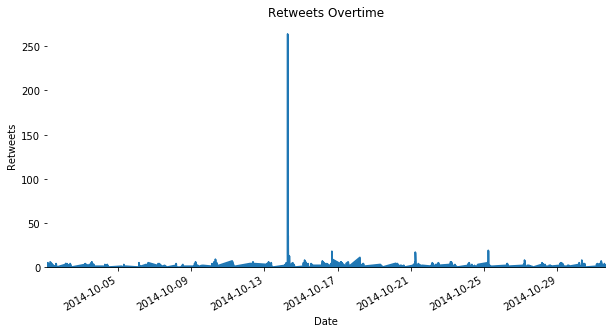

In [14]:
# Time Series

time_likes = pd.Series(data=df['retweet_count'].values, index=df['created_at'])
ax = time_likes.plot(kind='area',figsize=(10, 5), title="Retweets Overtime")
ax.set_ylabel('Retweets')
ax.set_xlabel('Date')
sns.despine(left=True)
plt.show()

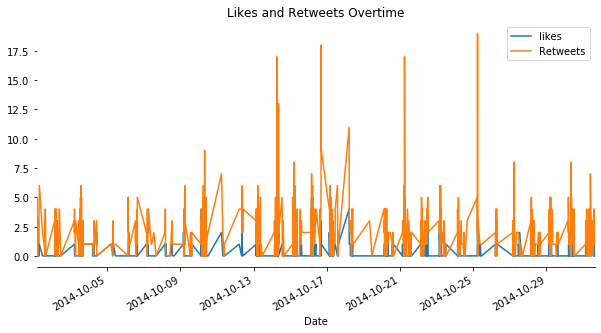

In [15]:
time_likes = pd.Series(data=df[df['favorite_count'] < 20]['favorite_count'].values,
                       index=df[df['favorite_count'] < 20]['created_at'])
ax1 = time_likes.plot(kind='line',figsize=(10, 5), label="likes", legend=True)

time_likes = pd.Series(data=df[df['retweet_count'] < 20]['retweet_count'] .values,
                       index=df[df['retweet_count'] < 20]['created_at'])
ax = time_likes.plot(kind='line',figsize=(10, 5), label="Retweets", legend=True, title="Likes and Retweets Overtime")
ax.set_xlabel('Date')
sns.despine(left=True)
plt.show()


In [16]:
# sns.set_color_codes(palette='deep')
# f, ax = plt.subplots(figsize=(16, 5))
# sns.tsplot(data=df, time="created_at", unit="text",
#            condition="source", value="favorite_count")
# plt.show()

In [17]:
df['retweet_count'].corr(df['favorite_count'])

0.7890223517569557

In [18]:
df['retweet_count'].value_counts()

1      387
2      298
0      226
3      149
4       75
5       36
6       15
8        4
7        4
9        3
17       2
96       1
11       1
13       1
16       1
18       1
19       1
25       1
36       1
264      1
Name: retweet_count, dtype: int64

In [19]:
df['favorite_count'].value_counts()

0     943
1     214
2      34
3      10
5       3
4       3
27      1
Name: favorite_count, dtype: int64

In [20]:
df['source'].value_counts()

Twitter Web Client    982
TweetDeck             207
Twitter for iPad       11
Twitter for iPhone      8
Name: source, dtype: int64

In [21]:

# using regular expressions for dealing with special patterns of noise.
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)", " ", tweet).split())

In [22]:
df['clean_tweets'] = df.text.apply(lambda x:clean_tweet(x))
df.drop(['text','is_retweet'], axis=1, inplace=True)

In [23]:
df[df['retweet_count'] == np.max(df['retweet_count'])]['clean_tweets']

592    AVOID HUGE delays Massive accident N12 East be...
Name: clean_tweets, dtype: object

In [24]:
# Drill down
df[df['favorite_count'] == np.max(df['favorite_count'])]['clean_tweets']

592    AVOID HUGE delays Massive accident N12 East be...
Name: clean_tweets, dtype: object

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/explore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Most Frequent Words On Tweets')

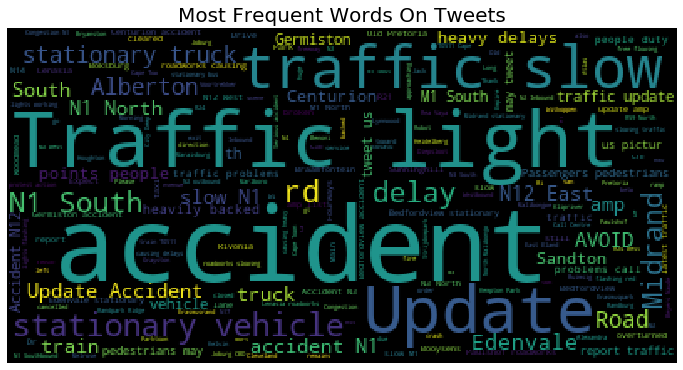

In [25]:
# wordcloud of the most frequently used words
nltk.download('stopwords')
stop_wrds = set(stopwords.words('english'))                 
fig, ax = plt.subplots(figsize=(12,8))
wc = WordCloud(stopwords=stop_wrds)
wordc = wc.generate(df['clean_tweets'].to_string())
ax.imshow(wordc)
ax.axis('off')
ax.set_title(label='Most Frequent Words On Tweets',fontdict = {'fontsize': 20})
    

# Sentiment Analysis

In [26]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
        
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == -1:
        return -1
    else:
        return -1

In [27]:

df['tweet_sentiment'] = df.clean_tweets.apply(lambda x:analyze_sentiment(x))
df.head()

,favorite_count,source,created_at,retweet_count,tweet_len,clean_tweets,tweet_sentiment
0,1,Twitter Web Client,2014-10-30 08:07:20+00:00,6,132,Reports of a shootout in Midrand on the N1 Nor...,-1
1,0,TweetDeck,2014-10-07 04:24:29+00:00,2,102,Lioghts OUT in City Deep at Heidelberg Rd and ...,-1
2,0,TweetDeck,2014-10-07 04:25:14+00:00,1,130,Lights OUT in Booysens at Booysens and Long as...,-1
3,0,Twitter Web Client,2014-10-22 06:44:25+00:00,1,110,remains very slow on the N1 North between Mali...,-1
4,1,Twitter Web Client,2014-10-14 06:35:48+00:00,2,83,Cash in Transit heist on Harley amp Oak Randburg,-1


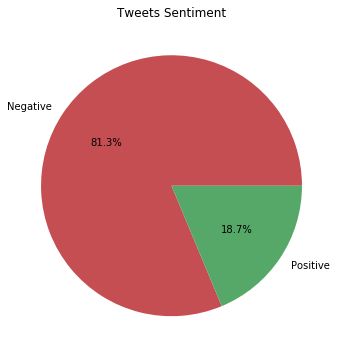

In [28]:
#visualise sentiment
negative = sum(df['tweet_sentiment'] == -1)
positive = sum(df['tweet_sentiment'] == 1)
# neutral = sum(df['tweet_sentiment'] == 0)

f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes(palette='deep')
plt.subplots_adjust(wspace = 0.5)
plt.pie([negative, positive],
        labels = ['Negative', 'Positive'],autopct='%1.1f%%', colors=['r','g'])
ax.set(title="Tweets Sentiment")
plt.show()

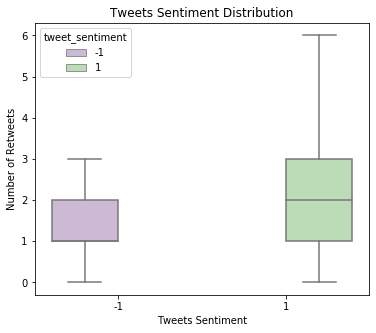

In [29]:

fig, (ax1) = plt.subplots(figsize=(6,5))
s = sns.boxplot(ax = ax1, x="tweet_sentiment", y="retweet_count", hue="tweet_sentiment",data=df, palette="PRGn",showfliers=False)
ax1.set(title="Tweets Sentiment")
ax1.set(title="Tweets Sentiment Distribution")
ax1.set(ylabel="Number of Retweets")
ax1.set(xlabel="Tweets Sentiment")

plt.show()

Positive sentiment has more normaly distributed than negative sentiment.

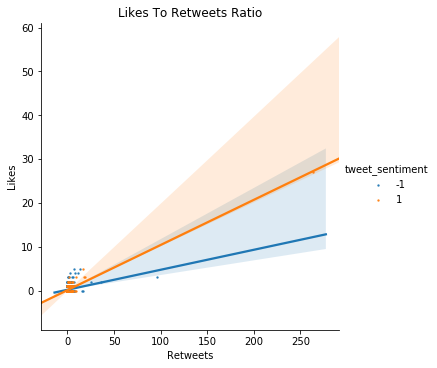

In [30]:
# Visualize likes and Retweets Ratio
s = sns.lmplot(x='retweet_count', y='favorite_count',data=df, hue='tweet_sentiment', fit_reg=True,scatter_kws={'s':2})
s.set(title="Likes To Retweets Ratio")
s.set(ylabel="Likes")
s.set(xlabel="Retweets")
plt.show()

Retweets turns to have a higher ratio than likes almost 3:1 ratio

# Topic Modeling

In [31]:
# pd.set_option("display.max_colwidth", 200)
# nltk.download('wordnet')
lem = WordNetLemmatizer() # returns the actual root word of a text token
corpus =[]
# cleaning text
for i in range(0,len(df['clean_tweets'])):

    tweet = re.sub('[^a-zA-Z0-9]', ' ',str(df[['clean_tweets']].iloc[i].values)) 
    tweet = tweet.lower()
    tweet = tweet.split()
    stop_wrds = set(stopwords.words('english'))
    tweet = [lem.lemmatize(word, "v") for word in tweet if not word in stop_wrds]
    corpus.append(tweet)

In [32]:
doc_clean = corpus
# Creating the term dictionary of our corpus, where every unique term is assigned an index.  
dictionary = gensim.corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above. 
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix
lda_model = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=50)

# Results 
print(lda_model.print_topics())

[(0, '0.064*"traffic" + 0.057*"slow" + 0.034*"n1" + 0.030*"north" + 0.024*"exit" + 0.022*"delay" + 0.021*"accident" + 0.019*"m1" + 0.017*"south" + 0.017*"drive"'), (1, '0.053*"traffic" + 0.043*"light" + 0.034*"amp" + 0.022*"road" + 0.020*"delay" + 0.014*"rd" + 0.013*"main" + 0.013*"witkoppen" + 0.013*"update" + 0.010*"people"'), (2, '0.042*"traffic" + 0.030*"us" + 0.020*"train" + 0.019*"town" + 0.019*"drive" + 0.018*"cancel" + 0.018*"cape" + 0.017*"report" + 0.016*"call" + 0.013*"tweet"'), (3, '0.052*"accident" + 0.040*"delay" + 0.036*"south" + 0.031*"road" + 0.024*"north" + 0.023*"n1" + 0.021*"exit" + 0.020*"n3" + 0.020*"stationary" + 0.018*"n12"')]


In [33]:
# Visualize the topics

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.209778  0.016229       1        1  42.539497
0      0.121165  0.076453       2        1  24.470346
1     -0.081414 -0.212916       3        1  20.615301
2     -0.249529  0.120235       4        1  12.374849, topic_info=    Category        Freq        Term       Total  loglift  logprob
36   Default  164.000000        slow  164.000000  30.0000  30.0000
37   Default  370.000000     traffic  370.000000  29.0000  29.0000
24   Default  110.000000       light  110.000000  28.0000  28.0000
64   Default  315.000000    accident  315.000000  27.0000  27.0000
38   Default  104.000000         amp  104.000000  26.0000  26.0000
..       ...         ...         ...         ...      ...      ...
37    Topic4   60.686607     traffic  370.909119   0.2793  -3.1672
179   Topic4   27.103785       drive   96.921158   0.8153  -3.9733
117   Topic4    9.483115     service   16.593464   1.5300  -5.0234
17    Topic4   10.408127  heidelberg   21.982870   1.3418  -4.9304
288   Topic4   11.563457         due   47.610508   0.6743  -4.8251

[222 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
636       4  0.899766         05
376       4  0.937959         06
403       4  0.909838         07
210       4  0.984799        083
780       2  0.967544       11th
...     ...       ...        ...
349       3  0.964609  witkoppen
63        1  0.204701   woodmead
63        2  0.767627   woodmead
362       3  0.952534       work
317       3  0.921126  ysterhout

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [34]:
# # TfidfVectorizer to create a document-term matrix with 1,000 terms.
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(stop_words='english', 
# max_features= 1000, # keep top 1000 terms 
# max_df = 0.5, 
# smooth_idf=True)

# X = vectorizer.fit_transform(df['clean_tweets'])

# X.shape # check shape of the document-term matrix

In [35]:
# from sklearn.decomposition import TruncatedSVD

# # SVD represent documents and terms in vectors 
# svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

# svd_model.fit(X)

# len(svd_model.components_)

In [36]:
# terms = vectorizer.get_feature_names()

# for i, comp in enumerate(svd_model.components_):
#     terms_comp = zip(terms, comp)
#     sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
#     print("Topic "+str(i)+": ")
#     for t in sorted_terms:
#         print(t[0])
#         print(" ")

In [37]:
# # Topics Visualization
# # !pip install umap-learn
# import umap

# X_topics = svd_model.fit_transform(X)
# embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

# plt.figure(figsize=(7,5))
# plt.scatter(embedding[:, 0], embedding[:, 1], 
# c = dataset.target,
# s = 10, # size
# edgecolor='none'
# )
# plt.show()

In [38]:
#Importing Twitter the data
df = pd.read_csv('/../edsa-traffic/Twitter/ewntraffic.csv')
df.drop(['id_str','in_reply_to_screen_name'], axis=1, inplace=True)
df.head()

,favorite_count,source,text,is_retweet,created_at,retweet_count
0,1,Twitter Web Client,Reports of a shootout in Midrand on the N1 Nor...,False,Thu Oct 30 08:07:20 +0000 2014,6
1,0,TweetDeck,#JHBtraffic - Lioghts OUT in City Deep at Heid...,False,Tue Oct 07 04:24:29 +0000 2014,2
2,0,TweetDeck,#JHBtraffic Lights OUT in Booysens at Booysens...,False,Tue Oct 07 04:25:14 +0000 2014,1
3,0,Twitter Web Client,#JHBTraffic remains very slow on the N1 North ...,False,Wed Oct 22 06:44:25 +0000 2014,1
4,1,Twitter Web Client,#JHBTraffic RT @jhbnorthmedix: Cash in Transit...,False,Tue Oct 14 06:35:48 +0000 2014,2


In [39]:

# (@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)

In [40]:
corpus =[]
# cleaning text
for i in range(0,len(df.text)):

    tweet = re.findall(r'In [\w\.-]+', str(df['text'][i]))
    stop_wrds = set(stopwords.words('english')) 
    tweet = [word for word in tweet if not word in stop_wrds]
    tweet = ' '.join(tweet)
    corpus.append(tweet)
    
df['locations'] = corpus

In [41]:
corpus[0:10]

['',
 '',
 'In Roodepoort',
 '',
 '',
 'In Lenasia',
 '',
 'In Woodmead',
 'In Windsor',
 '']

In [42]:
df['locations'] = df['locations'].apply(lambda x: x.replace('[',''))
df['locations'] = df['locations'].apply(lambda x: x.replace(']',''))
df['locations'] = df['locations'].apply(lambda x: x.replace('In',''))
df['locations'] = df['locations'].apply(lambda x: x.replace('[',''))
df['locations'] = df['locations'].apply(lambda x: x.replace(']',''))
df['locations'] = df['locations'].apply(lambda x: x.replace(' ',''))
df.head()


,favorite_count,source,text,is_retweet,created_at,retweet_count,locations
0,1,Twitter Web Client,Reports of a shootout in Midrand on the N1 Nor...,False,Thu Oct 30 08:07:20 +0000 2014,6,
1,0,TweetDeck,#JHBtraffic - Lioghts OUT in City Deep at Heid...,False,Tue Oct 07 04:24:29 +0000 2014,2,
2,0,TweetDeck,#JHBtraffic Lights OUT in Booysens at Booysens...,False,Tue Oct 07 04:25:14 +0000 2014,1,Roodepoort
3,0,Twitter Web Client,#JHBTraffic remains very slow on the N1 North ...,False,Wed Oct 22 06:44:25 +0000 2014,1,
4,1,Twitter Web Client,#JHBTraffic RT @jhbnorthmedix: Cash in Transit...,False,Tue Oct 14 06:35:48 +0000 2014,2,


In [43]:
df.locations.values
locs = []
for i in df.locations.values:
    if len(i) > 4:
        locs.append(i)
locs[0:5]

['Roodepoort', 'Lenasia', 'Woodmead', 'Windsor', 'Edenvale']

In [44]:
from geopy.geocoders import Nominatim
import gmplot

geolocator = Nominatim()

# Go through all tweets and add locations to 'coordinates' dictionary
coordinates = {'latitude': [], 'longitude': []}
for count, user_loc in enumerate(locs):
    try:
        location = geolocator.geocode(user_loc)
        
        # If coordinates are found for location
        if location:
            coordinates['latitude'].append(location.latitude)
            coordinates['longitude'].append(location.longitude)
            
    # If too many connection requests
    except:
        pass
    

In [45]:
len(coordinates['latitude'])

485

In [46]:
len(coordinates['longitude'])

485

In [47]:
df3 = pd.DataFrame({'latitude' : coordinates['latitude'],'longitude' : coordinates['longitude']})
df3.values

array([[-2.61563889e+01,  2.78858333e+01],
       [-2.63196311e+01,  2.78244324e+01],
       [-2.60433333e+01,  2.80644444e+01],
       [ 4.23042300e+01, -8.30298610e+01],
       [ 3.72649431e+01, -1.21818007e+02],
       [ 3.72649431e+01, -1.21818007e+02],
       [-2.62832168e+01,  2.79595970e+01],
       [ 5.68000000e+01, -5.00000000e+00],
       [ 5.13218837e+01, -1.05408816e+00],
       [-2.60682406e+01,  2.80479844e+01],
       [ 4.14203391e+01, -7.87286388e+01],
       [ 4.68116511e+01, -6.40656002e+01],
       [-2.63196311e+01,  2.78244324e+01],
       [ 4.00820260e+01, -8.30252130e+01],
       [-2.62294440e+01,  2.81805560e+01],
       [-2.62294440e+01,  2.81805560e+01],
       [-2.59992620e+01,  2.81259120e+01],
       [-2.59992620e+01,  2.81259120e+01],
       [-3.38107289e+01,  1.86675063e+01],
       [ 3.80565876e+01, -1.22243858e+02],
       [-4.52535683e+01,  1.69387084e+02],
       [ 4.68116511e+01, -6.40656002e+01],
       [-2.61763889e+01,  2.81425000e+01],
       [-2.

In [48]:
# import folium
# from folium import plugins
# from folium.plugins import HeatMap


# hmap = folium.Map(df3.values[0],
#                     zoom_start = 9, control_scale = True) 
# # for i in range(0, len(df)):
# #     folium.Marker(df.values[i], popup=df1['Gantry Name'].values[i], icon=folium.Icon(color='red')).add_to(hmap)


# heat_data = df3.values
# # Plot it on the map
# hmap.add_child(HeatMap(heat_data, radius = 15, gradient={.4: 'blue', .65: 'lime', 1: 'red'}))


# # Display the map
# hmap